# Homework 5

## Practical Questions

Import all the packages that you will use in your homework:

In [59]:
# Import all the required packages. Do not forget to include the classification and regression packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.naive_bayes import GaussianNB


### Practical Question 1:

In the first question we will create a simple linear regression model using a simple dataset: Values of actual Height, Weight and its reported values.

a) Start by importing the data from the 'Height.csv' file

In [2]:
#Import the data in the 'data' variable below
data = pd.read_csv('Height.csv') 

#Check if the data is correctly imported
print(data)

     Unnamed: 0 sex  weight  height  repwt  repht
0             1   M      77     187   77.0  180.0
1             2   F      58     156   51.0  159.0
2             3   F      53     156   54.0  158.0
3             4   M      68     182   70.0  175.0
4             5   F      59     152   59.0  155.0
5             6   M      76     175   76.0  165.0
6             7   M      76     172   77.0  165.0
7             8   M      69     191   73.0  180.0
8             9   M      71     183   71.0  175.0
9            10   M      65     176   64.0  170.0
10           11   M      70     180   75.0  174.0
11           13   F      51     156   52.0  158.0
12           14   F      64     163   64.0  165.0
13           15   F      52     158   57.0  160.0
14           16   F      65     161   66.0  165.0
15           17   M      92     192  101.0  185.0
16           18   F      62     163   62.0  165.0
17           19   M      76     202   75.0  200.0
18           20   F      61     170   61.0  171.0


b) Create an scatter plot of 'weigh' vs. 'height'. Do not forget to format the graph: include the axes labels and a title for the graph.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


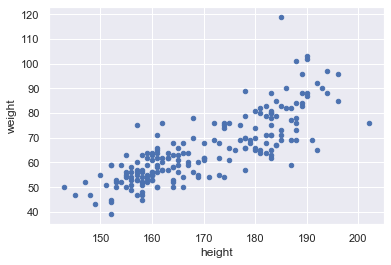

In [16]:
#Create the plot here. Do not forget to include the required code lines to visualize the graph directly in the notebook.
%matplotlib inline
data.plot(kind='scatter',x='height',y='weight')



Is there correlation between these variables? Don't forget to explain your answer. 

**Your answer:** Based on the scatterplot it seems that there is a slight positive correlation between height and weight.  This plot shows that (generally) as height increases, weight also increases.

c) Create a Linear Regression Model between the 'height' and 'weight' dimensions. 

In [12]:
# Construct your linear regression model named 'linear_model':
linear_model = LinearRegression(fit_intercept=True)

#The following lines will fit the data to our model. Check your answer!
weight = data['weight']
height = data['height']
linear_model.fit(height[:,np.newaxis],weight)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

d) Check if your model is working: 

-First generate 100 random points between 150 and 190.

-Predict this generated values using our previously created model **linear_model**.

-Plot the data and this new generated line

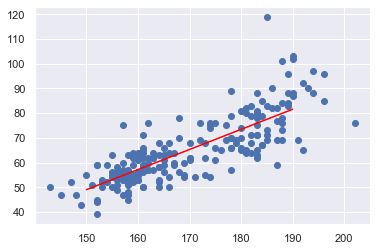

In [13]:
#Generate the 100 random numbers between 150 and 190 and save them in the 'xfit' variable
xfit = np.linspace(150,190,100)

#Predict the values from our random numbers and saved them in the 'yfit' variable.
yfit = linear_model.predict(xfit[:,np.newaxis])

#Check your answer
plt.scatter(data['height'],data['weight'])
plt.plot(xfit, yfit, color='red')
#You should get some points and a line

Is the model a good fit? Why?

**Your answer:**  The model seems like an ok fit because the line exists (fits) within the data and follows the same pattern. 

e) Find the interception of the line and the coefficient (slope) of the independent variable

In [17]:
#The slope (coefficient):
slope = linear_model.coef_[0]

#The intercept with the y-axis:
interception = linear_model.intercept_

#Check your answer:
print('Slope: ',slope,' y-intercept: ',interception)

Slope:  0.8144080226185751  y-intercept:  -73.1610664383499


What is the resulting equation of our model? What does it mean?

**Your answer:**  y = -73.1610664383499 + 0.8144080226185751 x    this means that each increment in the independent variable results in an increment of ~0.8 in the dependent variable

### Practical Question 2

In the second question we will create a classification model. We will use the same dataset we used for Practical Question 1.


a) Let's start by creating a density plot of the height for men and women in our dataset. 
To do this, you can use the **seaborn** package with the ***kdeplot*** option. For info on all the options you have for using it, you can refer to: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

Your graph should look something like this: 
<img src = "kdeplot.png">

**Hint:** If you want to add two plots in the same cell, you can obtain overlapped curves in the same figure just printing one plot first and then the following.

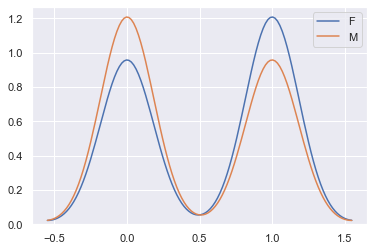

In [51]:
# Create your density plot here

sns.kdeplot(data.sex =='F', label = 'F')
sns.kdeplot(data.sex =='M', label = 'M')

Based on what you can see in the figure, do you think you can construct a classification model that would tell us whether a given value of 'height' corresponds to a man or a woman? Why?

**Your answer:** Yes because the values seem to be (mostly) distinct between classes (the lines do not overlap much)

By looking at the density plot, do you anticipate there will be errors in the prediction? Why? 

**Your answer:**  Yes, because some values belong to both classes (where the lines overlap) 

b) Create a Naive Bayes Gaussian classification model. The model will take height as the input and the categorical (class or label) value as the other inputr. The goal of the model is to predict the sex of a person based on his/her height.

In [47]:
# The name of your model should be GNB. You need to find the python function to create the 
# Gaussian Naive Bayesian model.
GNB = GaussianNB()

# The next step is to fit our data to the model using the .fit() method
height = data['height'] # obtain the height values from our 'data' dataframe
GNB.fit(height[:,np.newaxis], data['sex'])  # Fitting the model with the independent variable 'height' and the 
                                            # categorical (labeled) data 'sex'

GaussianNB(priors=None, var_smoothing=1e-09)

c) Test the model with some random data to obtain our predictions (probability). I have already created the Xtest variable, which contains some (10) random values of height between 160 and 180 cm. Using these data, predict the probabilities using the GNB model created in the previous cell.

In [54]:
# Generating the random values of height
rng = np.random.RandomState(0)
Xtest = [160, 0] + [20, 0] * rng.rand(10, 2)

Xtest

array([[170.97627008,   0.        ],
       [172.05526752,   0.        ],
       [168.47309599,   0.        ],
       [168.75174423,   0.        ],
       [179.27325521,   0.        ],
       [175.83450076,   0.        ],
       [171.36089122,   0.        ],
       [161.42072116,   0.        ],
       [160.40436795,   0.        ],
       [175.56313502,   0.        ]])

In [55]:
# Predict the probabilities that the values generated above correspond to men or women, using the GNB model and save them in the 'yprob' values.

yprob = GNB.predict_proba(Xtest) 

#Visualizing the resulting probabilities, rounding them to 3 decimal points. Check your answer!
yprob.round(3) 

array([[1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.989, 0.011],
       [0.999, 0.001],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.999, 0.001]])

In [53]:
# The above probabilites correspond to the following classes
GNB.classes_

array(['F', 'M'], dtype='<U1')

What are these probabilities telling you? Why? 

**Your answer:**  For the 5th, 6th and last values, the probability is less certain ( < 1 ). This means that it's less likely to correctly classify these values.  This is probably because the value occurs at similar frequency in both the men and women classes.  However, since thresholds are commonly .9 these values could most likely still be classified.

c) Test the model with some random data to obtain our predictions (probability). I have already created the Xtest variable, which contains some (10) random values of height between 200 and 210 cm. Using these data, predict the probabilities using the GNB model created in the previous cell.

In [56]:
# Generating the random values of height between 200 and 210
rng = np.random.RandomState(0)
Xtest = [200, 0] + [10, 0] * rng.rand(10, 2)

Xtest

array([[205.48813504,   0.        ],
       [206.02763376,   0.        ],
       [204.23654799,   0.        ],
       [204.37587211,   0.        ],
       [209.63662761,   0.        ],
       [207.91725038,   0.        ],
       [205.68044561,   0.        ],
       [200.71036058,   0.        ],
       [200.20218397,   0.        ],
       [207.78156751,   0.        ]])

In [57]:
# Predict the probabilities that the values generated above correspond to men or women, using the GNB model

yprob = GNB.predict_proba(Xtest)

#Visualizing the resulting probabilities, rounding them to 3 decimal points
yprob.round(3) 

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [58]:
# The above probabilites correspond to the following classes
GNB.classes_

array(['F', 'M'], dtype='<U1')

What are these probabilities telling you? Why?

**Your Answer:**  This shows a high probability of correctly classifying each of these values because they are all = 1, so there is high certainty. This is most likely because there are no women that had height values in this range. 